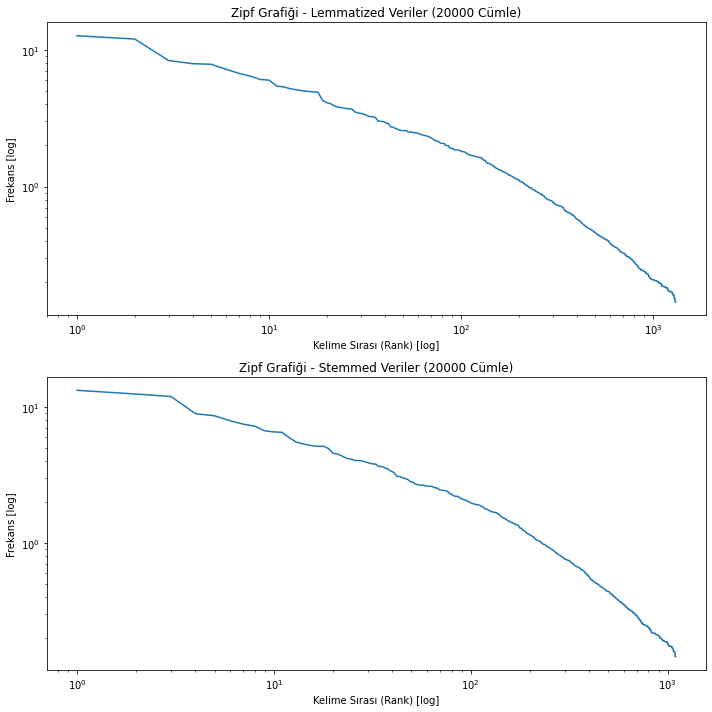

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. CSV dosyalarını okur
df_lemma = pd.read_csv("vectors/tfidf_lemmatized_20000.csv")
df_stem = pd.read_csv("vectors/tfidf_stemmed_20000.csv")

# 2. Toplam kelime frekanslarını alır
lemma_freq = df_lemma.sum().sort_values(ascending=False)
stem_freq = df_stem.sum().sort_values(ascending=False)

# 3. Rank ve frekansları log-log için hazırlar
lemma_ranks = range(1, len(lemma_freq)+1)
stem_ranks = range(1, len(stem_freq)+1)

# 4. Plot - log-log skala
plt.figure(figsize=(10, 10))

# Lemmatized grafik
plt.subplot(2, 1, 1)
plt.plot(lemma_ranks, lemma_freq.values)
plt.xscale('log')
plt.yscale('log')
plt.title("Zipf Grafiği - Lemmatized Veriler (20000 Cümle)")
plt.xlabel("Kelime Sırası (Rank) [log]")
plt.ylabel("Frekans [log]")

# Stemmed grafik
plt.subplot(2, 1, 2)
plt.plot(stem_ranks, stem_freq.values)
plt.xscale('log')
plt.yscale('log')
plt.title("Zipf Grafiği - Stemmed Veriler (20000 Cümle)")
plt.xlabel("Kelime Sırası (Rank) [log]")
plt.ylabel("Frekans [log]")

plt.tight_layout()
plt.show()


C:\Users\Beyza\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Beyza\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


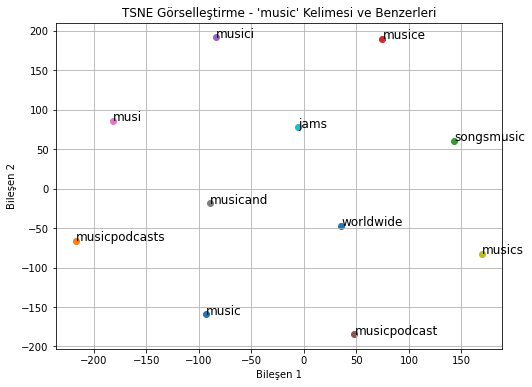

In [4]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


model = Word2Vec.load("models0/lemmatized_skipgram_win4_dim300.model")

# Benzer kelimeleri alır
target = "music"
similar_words = [target] + [w for w, _ in model.wv.most_similar(target, topn=10)]

# Vektörleri alır
word_vectors = [model.wv[word] for word in similar_words]

# TSNE ile 2D'ye indir
tsne = TSNE(n_components=2, random_state=42)
coords = tsne.fit_transform(word_vectors)

plt.figure(figsize=(8, 6))
for i, word in enumerate(similar_words):
    x, y = coords[i]
    plt.scatter(x, y)
    plt.annotate(word, (x, y), fontsize=12)
plt.title("TSNE Görselleştirme - 'music' Kelimesi ve Benzerleri")
plt.xlabel("Bileşen 1")
plt.ylabel("Bileşen 2")
plt.grid(True)
plt.show()


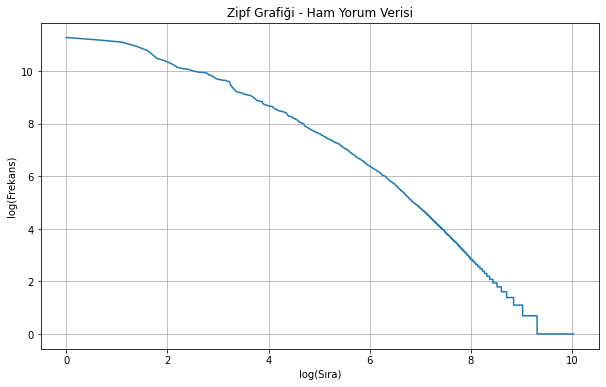

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import math
import re

# 1. Veriyi oku
df = pd.read_csv("reviews_cleaned_ultimate.csv")
reviews = df['Review'].dropna().astype(str).tolist()

# 2. Tüm metni birleştir ve küçük harfe çevir
text = ' '.join(reviews).lower()

# 3. Noktalama ve özel karakterleri kaldır, sadece kelimeleri al
tokens = re.findall(r'\b[a-z]+\b', text)

# 4. Frekans hesapla
freq_dist = Counter(tokens)
sorted_freqs = sorted(freq_dist.values(), reverse=True)

# 5. Log-log dönüşüm
ranks = range(1, len(sorted_freqs) + 1)
log_ranks = [math.log(rank) for rank in ranks]
log_freqs = [math.log(freq) for freq in sorted_freqs]

# 6. Zipf Grafiği
plt.figure(figsize=(10, 6))
plt.plot(log_ranks, log_freqs)
plt.title("Zipf Grafiği - Ham Yorum Verisi")
plt.xlabel("log(Sıra)")
plt.ylabel("log(Frekans)")
plt.grid(True)
plt.show()
